# Seaborn Basics


In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze a restaurant invoices and tips

In [118]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 1. Counting number of datapoints
---

❓ **On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order
- Don't use rainbow colors

<AxesSubplot:xlabel='day', ylabel='count'>

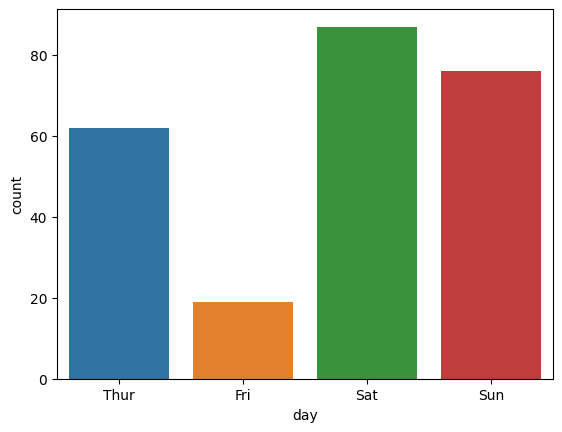

In [119]:
# YOUR CODE HERE
ordered_days = ['Thur', 'Fri', 'Sat', 'Sun']
sns.countplot(x = 'day', data = df, order = ordered_days)

❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

<AxesSubplot:xlabel='day', ylabel='count'>

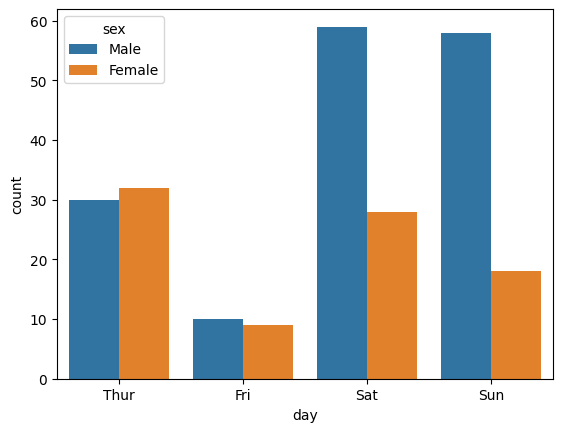

In [120]:
# YOUR CODE HERE
sns.countplot(x = 'day', hue = "sex", data = df, order = ordered_days)

## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seaborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

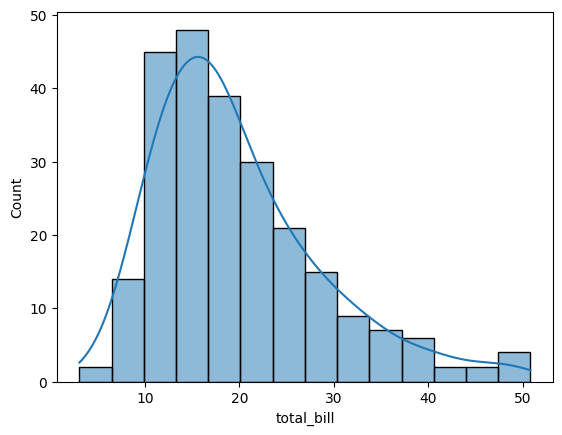

In [121]:
# YOUR CODE HERE
sns.histplot(df['total_bill'], kde=True);


### 2.1 Multiples distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots (`"bar"`, `"box"`, `"violin"`, `"boxen"`)

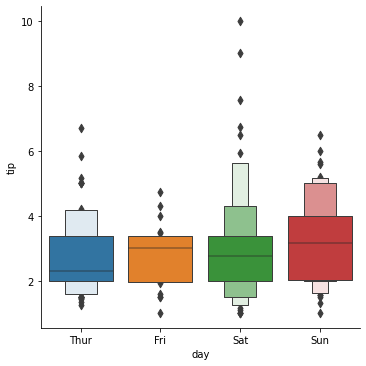

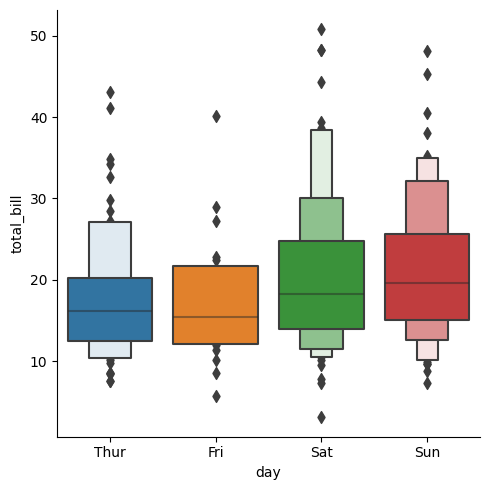

In [122]:
# YOUR CODE HERE
sns.catplot(x='day', y='total_bill', data=df, kind="boxen")

### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` inside `g.map` to another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

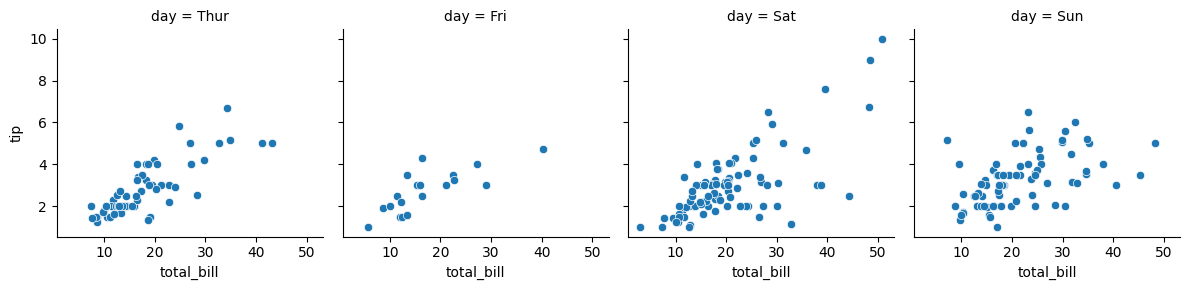

In [123]:
g = sns.FacetGrid(df, col="day")
g.map(sns.scatterplot, 'total_bill', 'tip')

❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

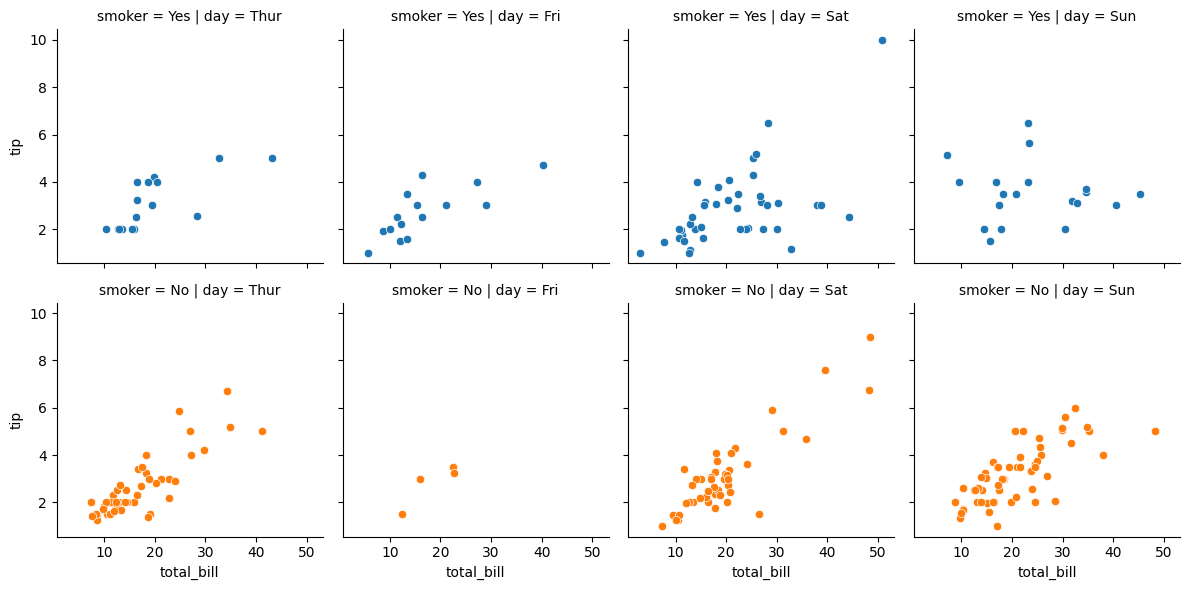

In [124]:
# YOUR CODE HERE
g = sns.FacetGrid(df, row="smoker", col="day", hue="smoker")
g.map(sns.scatterplot, 'total_bill', 'tip')

## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

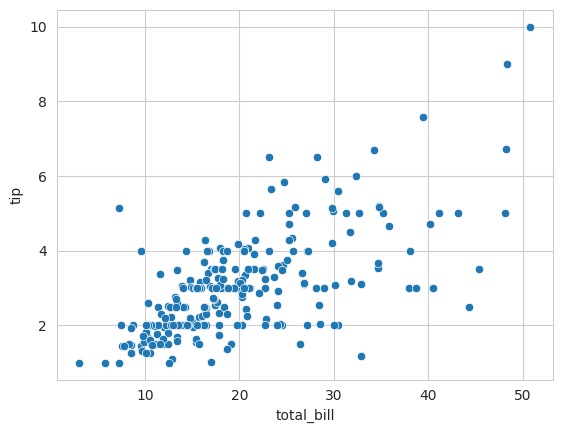

In [125]:
# YOUR CODE HERE
with sns.axes_style('whitegrid'): 
    # sns.set(style="whitegrid") for global change
    sns.scatterplot(x="total_bill", y="tip", data=df);

❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

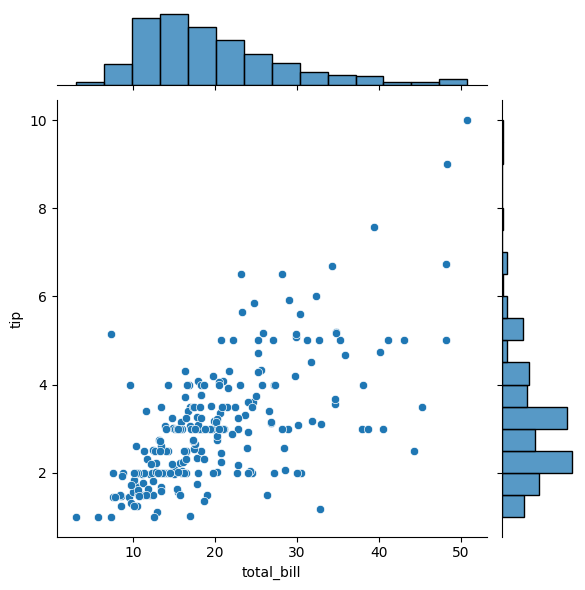

In [126]:
# YOUR CODE HERE
sns.jointplot(x="total_bill", y="tip", data=df)

❓ Let's now compute a simple linear regression curve using `sns.regplot()`

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

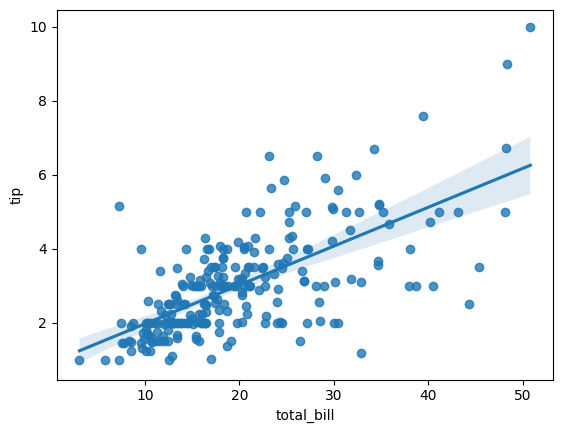

In [127]:
# YOUR CODE HERE
sns.regplot(x='total_bill', y='tip', data=df)

❓Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

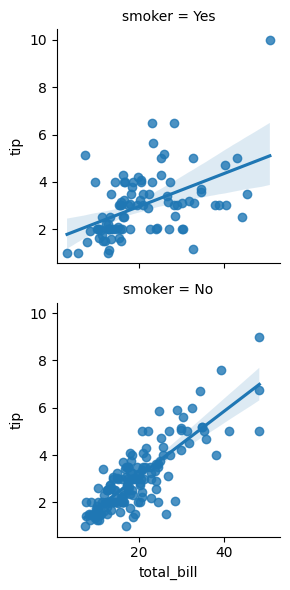

In [130]:
# YOUR CODE HERE
g = sns.FacetGrid(df, row="smoker")
g.map(sns.regplot, 'total_bill', 'tip')


## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

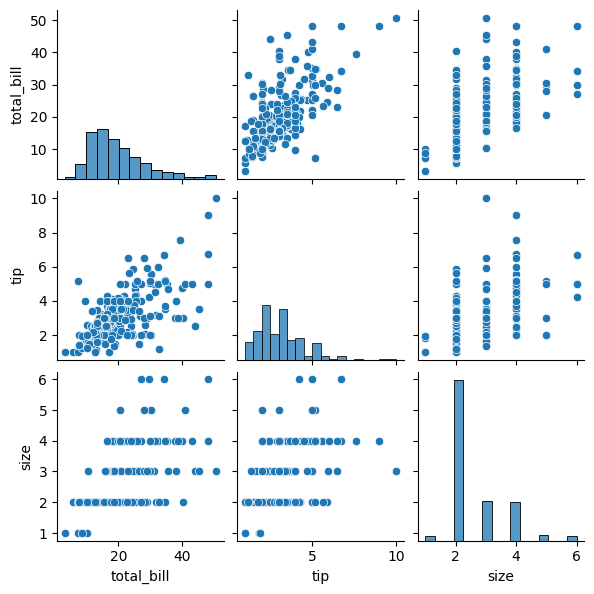

In [132]:
# YOUR CODE HERE
sns.pairplot(df, height=2)